In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train_dt = pd.read_csv('./data/train.csv')
train_dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 전체 탑승객 생존율 확인

C:\Users\Park\AppData\Local\Temp\ipykernel_11020\3776284780.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set(xlabel='', xticklabels=labels)


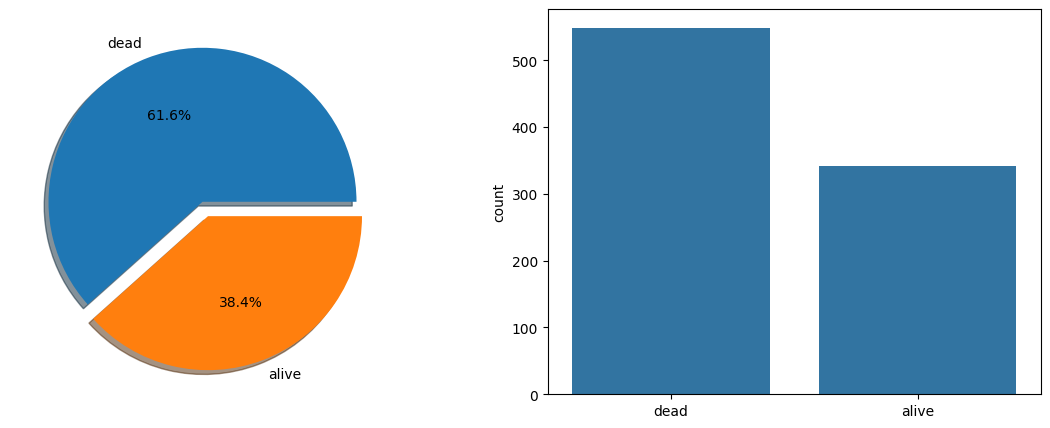

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
labels = ['dead', 'alive']

train_dt['Survived'].value_counts().plot.pie(ax=ax[0], explode=[0,0.1], shadow=True, autopct='%1.1f%%', labels=labels)
ax[0].set(ylabel='')

sns.countplot(data=train_dt, x='Survived', ax=ax[1])
ax[1].set(xlabel='', xticklabels=labels)

plt.show()



# 탑승객의 정보와 생존과의 Correlation 찾기

## 탑승권의 등급과 생존률 간의 관계

In [8]:
train_dt['Sex'].unique() 

array(['male', 'female'], dtype=object)

In [9]:
train_dt['Pclass'].unique() # 탑승권 등급

array([3, 1, 2])

In [10]:
train_dt['Pclass'].value_counts() # 등급 당 승객 수

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

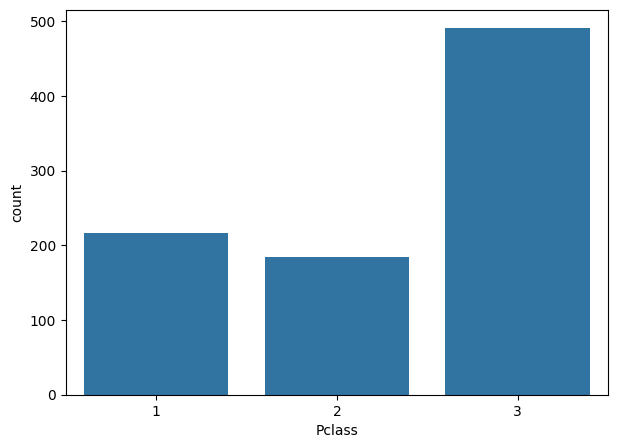

In [11]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(data=train_dt, x='Pclass', ax=ax)
plt.show()

In [12]:
train_dt[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived')

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


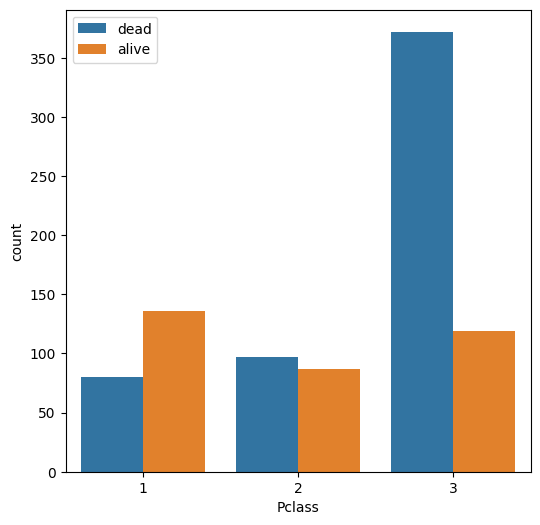

In [13]:
fig, ax = plt.subplots(figsize=(6,6))

sns.countplot(data=train_dt, x='Pclass', hue='Survived', ax=ax)

labels = ['dead', 'alive']
ax.legend(labels=labels)

plt.show()

## 성별과 생존간의 관계

C:\Users\Park\AppData\Local\Temp\ipykernel_11020\1884392745.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set(xticklabels=labels, xlabel='')


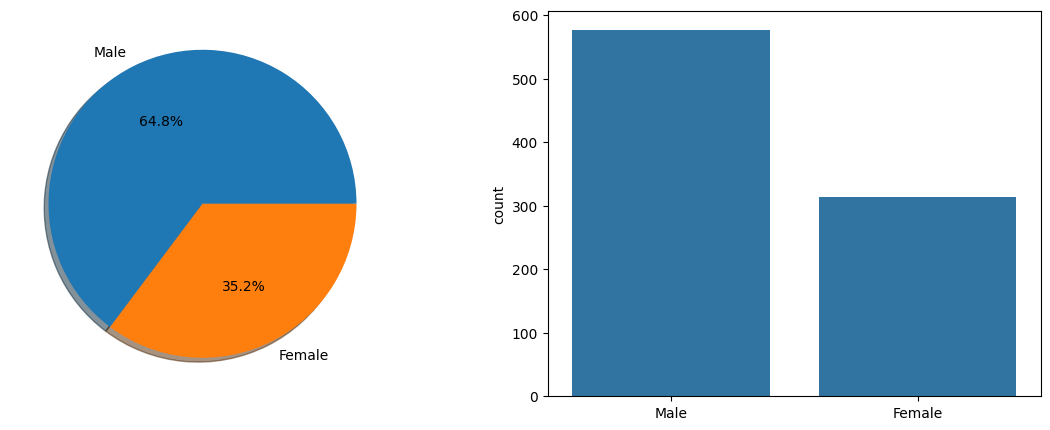

In [14]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
labels = ['Male', 'Female']

train_dt['Sex'].value_counts().plot.pie(ax=ax[0], shadow=True, autopct='%1.1f%%', labels=labels)
ax[0].set(ylabel='')

sns.countplot(data=train_dt, x='Sex', ax=ax[1])
ax[1].set(xticklabels=labels, xlabel='')

plt.show()

In [15]:
train_dt[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


C:\Users\Park\AppData\Local\Temp\ipykernel_11020\292684178.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['Male', 'Female'], xlabel='')


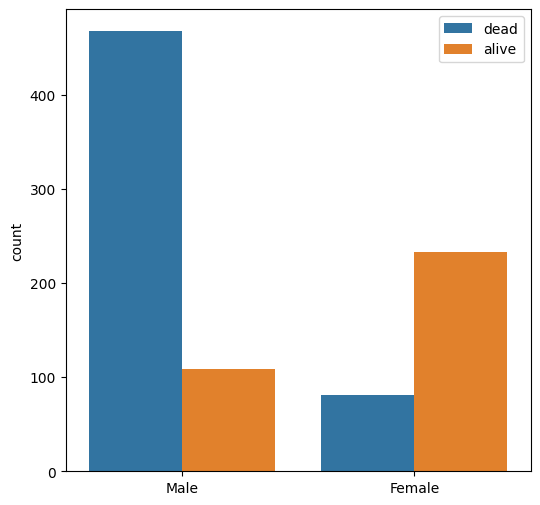

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(data=train_dt, x='Sex', hue='Survived', ax=ax)
ax.set(xticklabels=['Male', 'Female'], xlabel='')

labels = ['dead', 'alive']  
ax.legend(labels=labels)

plt.show()

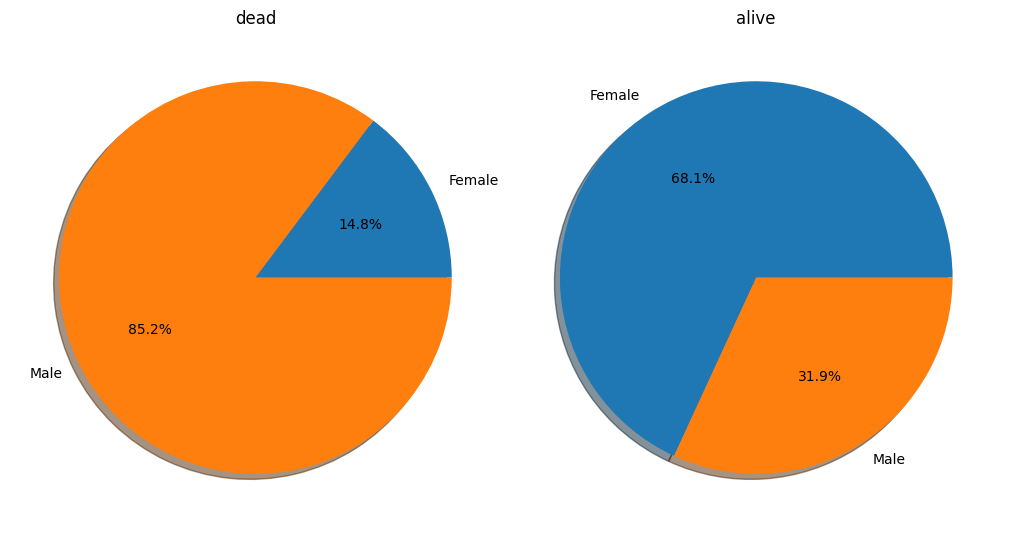

In [18]:
fig, ax = plt.subplots(1,2,figsize=(10,6), constrained_layout=True)
labels = ['Female', 'Male']

train_dt[train_dt['Survived'] == 0]['Sex'].value_counts().sort_index().plot.pie(ax=ax[0], shadow=True, autopct='%1.1f%%', labels=labels)
ax[0].set(ylabel='', title='dead')

train_dt[train_dt['Survived'] == 1]['Sex'].value_counts().sort_index().plot.pie(ax=ax[1], shadow=True, autopct='%1.1f%%', labels=labels)
ax[1].set(ylabel='', title='alive')

plt.show()

## 나이별 생존율 확인

- 탑승객 나이 분포 확인

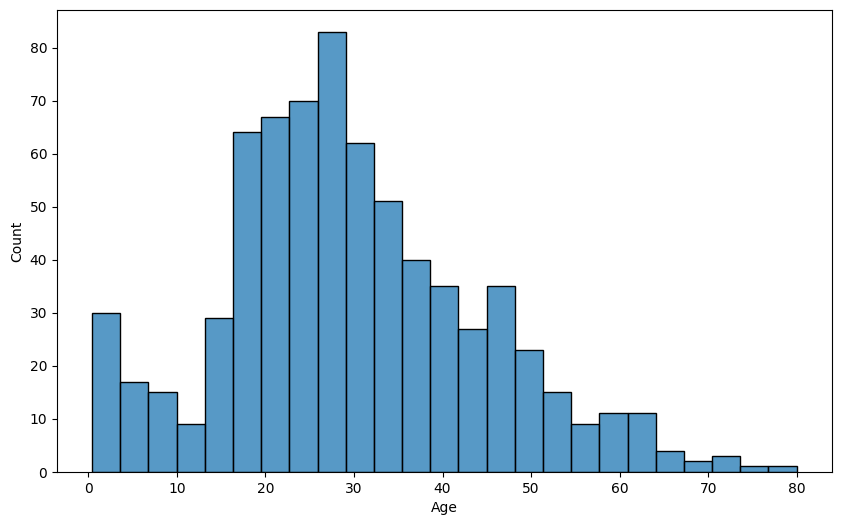

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(train_dt['Age'], bins=25, ax=ax)
plt.show()

In [25]:
# 나이별 생존율 list
survival_ratio_through_age = []

for i in range(1,80):
    survival_ratio_through_age.append(train_dt[train_dt['Age']<i] ['Survived'].sum() / len(train_dt[train_dt['Age']<i]['Survived']))

survival_ratio_through_age

[np.float64(1.0),
 np.float64(0.8571428571428571),
 np.float64(0.625),
 np.float64(0.6666666666666666),
 np.float64(0.675),
 np.float64(0.7045454545454546),
 np.float64(0.7021276595744681),
 np.float64(0.68),
 np.float64(0.6666666666666666),
 np.float64(0.6129032258064516),
 np.float64(0.59375),
 np.float64(0.5735294117647058),
 np.float64(0.5797101449275363),
 np.float64(0.5915492957746479),
 np.float64(0.5769230769230769),
 np.float64(0.5903614457831325),
 np.float64(0.55),
 np.float64(0.5398230088495575),
 np.float64(0.5035971223021583),
 np.float64(0.4817073170731707),
 np.float64(0.45555555555555555),
 np.float64(0.4264705882352941),
 np.float64(0.42424242424242425),
 np.float64(0.41700404858299595),
 np.float64(0.4244604316546763),
 np.float64(0.4119601328903654),
 np.float64(0.40752351097178685),
 np.float64(0.41839762611275966),
 np.float64(0.4065934065934066),
 np.float64(0.40625),
 np.float64(0.40389294403892945),
 np.float64(0.40654205607476634),
 np.float64(0.41071428571428

- 나이별 생존율

Text(0.5, 0, 'Age')

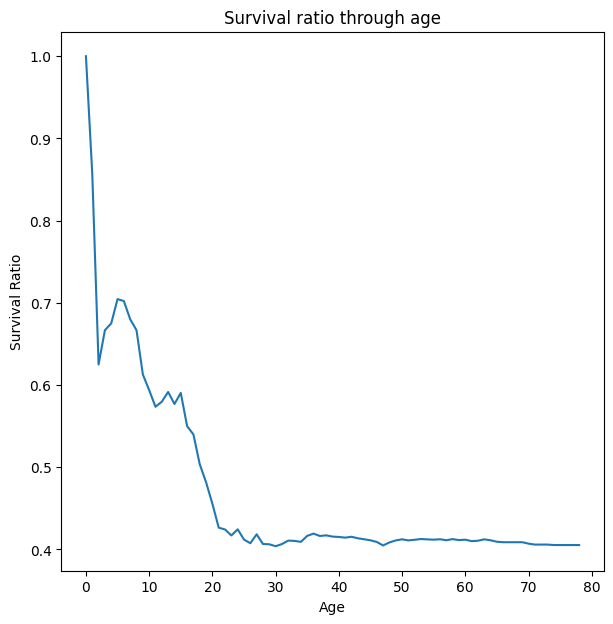

In [27]:
plt.figure(figsize=(7,7))
plt.plot(survival_ratio_through_age)
plt.title('Survival ratio through age') 
plt.ylabel('Survival Ratio')
plt.xlabel('Age')

## Embarked 항구와 생존 유무 확인

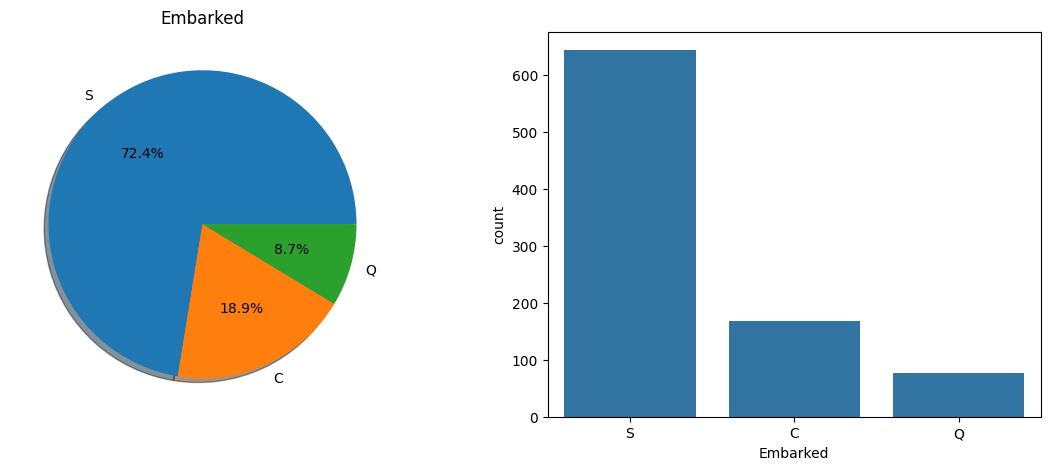

In [29]:
fig, ax = plt.subplots(1,2,figsize=(14,5))

train_dt['Embarked'].value_counts().plot.pie(ax=ax[0], shadow=True, autopct = '%1.1f%%')
ax[0].set(title='Embarked', ylabel='')

sns.countplot(data=train_dt, x='Embarked', ax=ax[1])
plt.show()

- S항구가 제일 많다. 저 항구에서 탄 사람들의 객실 등급을 확인해보면 좋을 것 같다.

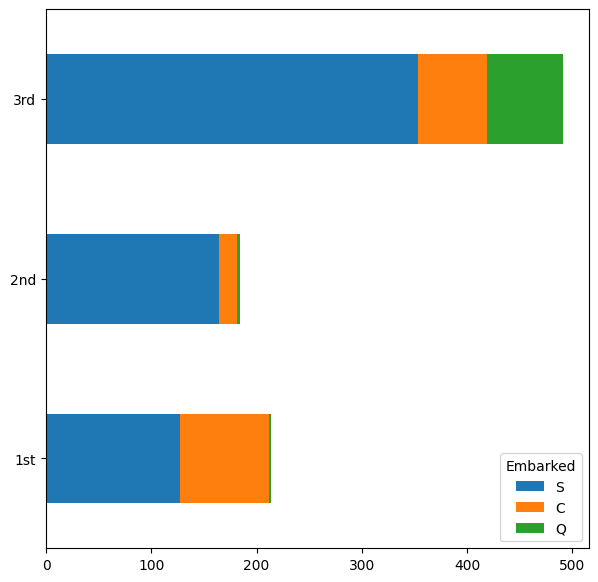

In [31]:
first_class = train_dt[train_dt['Pclass']==1]['Embarked'].value_counts()
second_class = train_dt[train_dt['Pclass']==2]['Embarked'].value_counts()
third_class = train_dt[train_dt['Pclass']==3]['Embarked'].value_counts()

fig, ax = plt.subplots(figsize=(7,7))
df = pd.DataFrame([first_class,second_class,third_class])
df.index = ['1st', '2nd', '3rd']
df.plot(kind='barh', stacked=True, ax=ax)
plt.show()

- 사람도 많이 타고 3등급 사람도 제일 많았다..


### 요금이랑 객실 등급 생존율 관계가?

C:\Users\Park\AppData\Local\Temp\ipykernel_11020\1266407216.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_dt['Fare'], bins=25, ax=ax)


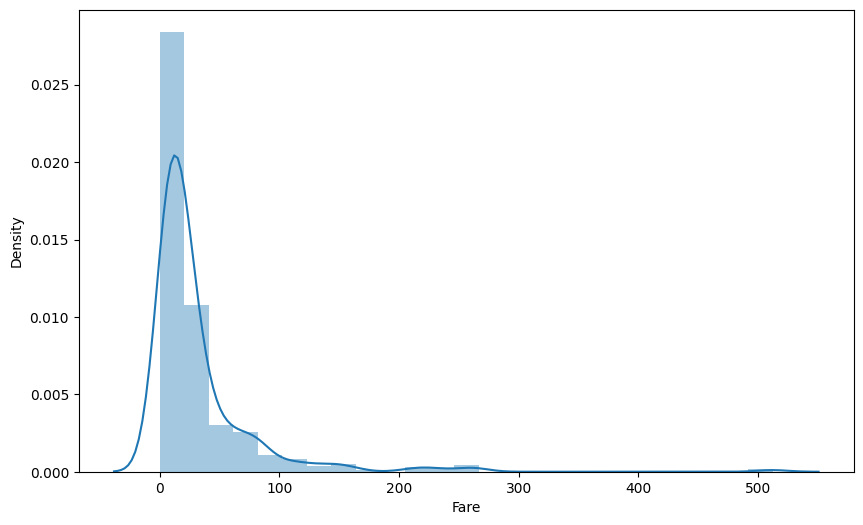

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(train_dt['Fare'], bins=25, ax=ax)
plt.show()

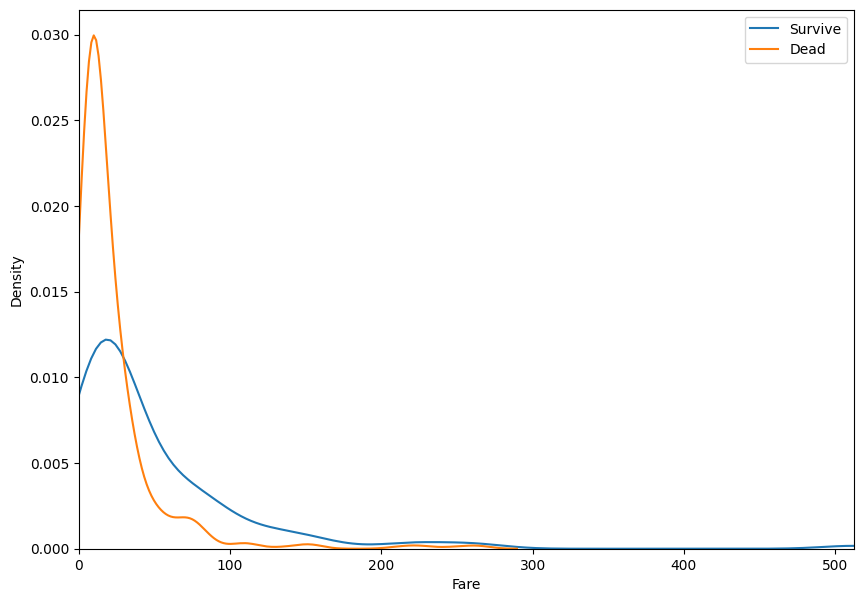

In [34]:
fig, ax = plt.subplots(figsize=(10,7))

sns.kdeplot(train_dt[train_dt['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train_dt[train_dt['Survived']==0]['Fare'], ax=ax)

ax.set(xlim=(0, train_dt['Fare'].max()))
ax.legend(['Survive', 'Dead'])

plt.show()

## 티켓과 객실 번호의 특징도 확인?


In [35]:
train_dt['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [36]:
train_dt['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

특징 찾기는 어려워보임..

## Feature 찾기

In [52]:
train_dt = pd.read_csv('./data/train.csv')
test_dt = pd.read_csv('./data/test.csv')

train_test_dt = [train_dt, test_dt] 


In [53]:
for data in train_test_dt:
    data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False) 
    
train_dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [54]:
# Crosstab을 이용하여 성별 분포 확인
pd.crosstab(train_dt['Title'], train_dt['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [55]:
pd.crosstab(test_dt['Title'], test_dt['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [56]:
for data in train_test_dt:
    data['Title'] = data['Title'].replace(['Capt', 'Col', 'Countess', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir'], 'Others')   
    data['Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
    data['Title'] = data['Title'].replace('Don', 'Mr')
    data['Title'] = data['Title'].replace(['Mme', 'Lady', 'Dona'], 'Mrs')
    

train_dt[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.795276
1,Miss,0.702703
0,Master,0.575000
4,Others,0.333333
2,Mr,0.156371


In [57]:
for data in train_test_dt:
    data.drop('Name', inplace=True, axis=1) 

train_dt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [51]:
# 타이틀 매핑
Title_mapping = {'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Others':4}

for data in train_test_dt:
    data['Title'] = data['Title'].map(Title_mapping).astype(int)
    
train_dt.head()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [58]:
train_dt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [59]:
# 성별 매핑
for data in train_test_dt:
    data['Sex'] = data['Sex'].map({'male':0, 'female':1}).astype(int)
    
train_dt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr


In [60]:
# 나이 결측값에 Title별 나이의 평균값 넣기
for data in train_test_dt:
    data['Age'].fillna(data.groupby('Title')['Age'].transform('mean'), inplace=True)
    
train_dt.info()
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

C:\Users\Park\AppData\Local\Temp\ipykernel_11020\2563415111.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data.groupby('Title')['Age'].transform('mean'), inplace=True)
C:\Users\Park\AppData\Local\Temp\ipykernel_11020\2563415111.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [62]:
train_dt['AgeRange'] = pd.cut(train_dt['Age'], 5)

train_dt[['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean().sort_values(by='AgeRange', ascending=True)

C:\Users\Park\AppData\Local\Temp\ipykernel_11020\4182963060.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_dt[['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean().sort_values(by='AgeRange', ascending=True)


,AgeRange,Survived
0,"(0.34, 16.336]",0.548077
1,"(16.336, 32.252]",0.392670
2,"(32.252, 48.168]",0.320000
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [63]:
# AgeRange 범위대로 값 바꿈
for data in train_test_dt:
    data.loc[data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age'] = 4
    
    data['Age'] = data['Age'].astype(int)
    
train_dt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeRange
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,Mr,"(16.336, 32.252]"
1,2,1,1,1,2,1,0,PC 17599,71.2833,C85,C,Mrs,"(32.252, 48.168]"
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(16.336, 32.252]"
3,4,1,1,1,2,1,0,113803,53.1000,C123,S,Mrs,"(32.252, 48.168]"
4,5,0,3,0,2,0,0,373450,8.0500,NaN,S,Mr,"(32.252, 48.168]"


In [65]:
# AgeRange 삭제
train_dt.drop('AgeRange', inplace=True, axis=1) 

train_dt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,1,2,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,1,2,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,0,2,0,0,373450,8.0500,NaN,S,Mr


In [66]:
# SibSp + Parch + 1 = FamilySize
for data in train_test_dt:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

train_dt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,1,2,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,1,2,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,0,2,0,0,373450,8.0500,NaN,S,Mr,1


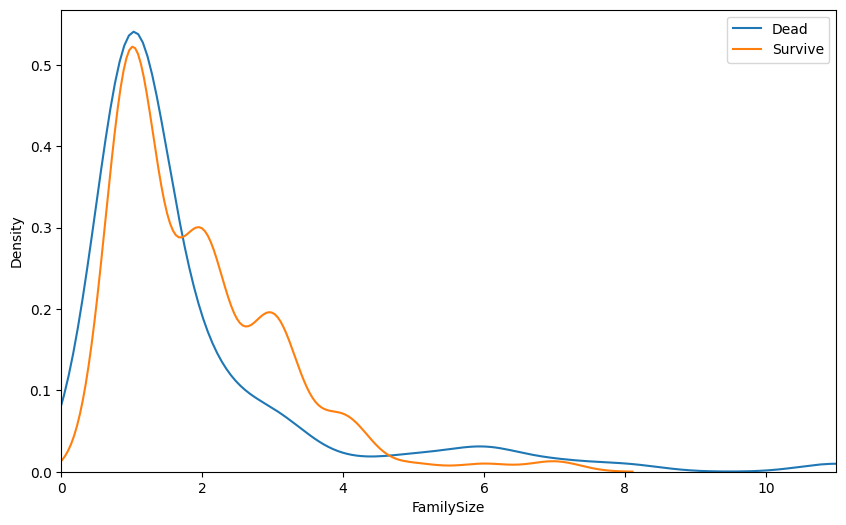

In [69]:
# 시각화
fig, ax = plt.subplots(figsize=(10,6))

# Survived의 0,1의 경우에 Familysize 분포 확인
sns.kdeplot(train_dt[train_dt["Survived"] == 0]["FamilySize"], ax=ax)
sns.kdeplot(train_dt[train_dt["Survived"] == 1]["FamilySize"], ax=ax)

ax.set(xlim=(0, train_dt['FamilySize'].max()))
plt.legend(['Dead', 'Survive'])

plt.show()

In [70]:
# SibSp, Parch 삭제

drop = ['SibSp', 'Parch']   

for data in train_test_dt:
    data.drop(drop, inplace=True, axis=1)
    
train_dt.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,1,2,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,1,1,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,1,2,113803,53.1000,C123,S,Mrs,2
4,5,0,3,0,2,373450,8.0500,NaN,S,Mr,1


In [80]:
# Embarked nan에 S삽입
train_dt['Embarked'].fillna('S', inplace=True)

In [81]:
print(train_dt['Embarked'].isnull().sum())

0


In [82]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}

for data in train_test_dt:
    data['Embarked'] = data['Embarked'].map(embarked_mapping).astype(int)



In [83]:
train_dt.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1,A/5 21171,7.2500,NaN,0,Mr,2
1,2,1,1,1,2,PC 17599,71.2833,C85,1,Mrs,2
2,3,1,3,1,1,STON/O2. 3101282,7.9250,NaN,0,Miss,1
3,4,1,1,1,2,113803,53.1000,C123,0,Mrs,2
4,5,0,3,0,2,373450,8.0500,NaN,0,Mr,1


In [84]:
# Fare 결측치도  처리

for data in train_test_dt:
    data['Fare'].fillna(data.groupby('Pclass')['Fare'].transform('mean'), inplace=True)
    
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int64  
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     891 non-null    int64  
 9   Title        891 non-null    object 
 10  FamilySize   891 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 76.7+ KB


C:\Users\Park\AppData\Local\Temp\ipykernel_11020\2488049231.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Fare'].fillna(data.groupby('Pclass')['Fare'].transform('mean'), inplace=True)


In [85]:
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Ticket       418 non-null    object 
 5   Fare         418 non-null    float64
 6   Cabin        91 non-null     object 
 7   Embarked     418 non-null    int64  
 8   Title        418 non-null    object 
 9   FamilySize   418 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 32.8+ KB


In [87]:
# FareRange에 Fare를 4등분 하여 구분하기
train_dt['FareRange'] = pd.cut(train_dt['Fare'], 4)

# FareRange마다 Survived 구해보기
train_dt[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)

C:\Users\Park\AppData\Local\Temp\ipykernel_11020\3369908636.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_dt[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)


,FareRange,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [88]:
# FareRange 범위 대로 값 변경
for data in train_test_dt:
    data.loc[ data['Fare'] <= 128, 'Fare'] = 0
    data.loc[(data['Fare'] > 128) & (data['Fare'] <= 256), 'Fare'] = 1
    data.loc[(data['Fare'] > 256) & (data['Fare'] <= 384), 'Fare'] = 2
    data.loc[(data['Fare'] > 384, 'Fare')] = 3
    
    data['Fare'] = data['Fare'].astype(int)

train_dt.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FareRange
0,1,0,3,0,1,A/5 21171,0,NaN,0,Mr,2,"(-0.512, 128.082]"
1,2,1,1,1,2,PC 17599,0,C85,1,Mrs,2,"(-0.512, 128.082]"
2,3,1,3,1,1,STON/O2. 3101282,0,NaN,0,Miss,1,"(-0.512, 128.082]"
3,4,1,1,1,2,113803,0,C123,0,Mrs,2,"(-0.512, 128.082]"
4,5,0,3,0,2,373450,0,NaN,0,Mr,1,"(-0.512, 128.082]"


In [133]:
# FareRange 제거
train_dt.drop('FareRange', inplace=True, axis=1)
    
train_dt.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1,A/5 21171,0,NaN,0,Mr,2
1,2,1,1,1,2,PC 17599,0,C85,1,Mrs,2
2,3,1,3,1,1,STON/O2. 3101282,0,NaN,0,Miss,1
3,4,1,1,1,2,113803,0,C123,0,Mrs,2
4,5,0,3,0,2,373450,0,NaN,0,Mr,1


In [134]:
data_drop = ['Ticket', 'Cabin', 'PassengerId']

for data in train_test_dt:
    data.drop(data_drop, inplace=True, axis=1)
    
train_dt.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1,0,0,Mr,2
1,1,1,1,2,0,1,Mrs,2
2,1,3,1,1,0,0,Miss,1
3,1,1,1,2,0,0,Mrs,2
4,0,3,0,2,0,0,Mr,1


In [135]:
train_dt = pd.get_dummies(train_dt, columns=['Title'], prefix='Title')  
test_dt = pd.get_dummies(test_dt, columns=['Title'], prefix='Title')

In [136]:
train_dt

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,3,0,1,0,0,2,False,False,True,False,False
1,1,1,1,2,0,1,2,False,False,False,True,False
2,1,3,1,1,0,0,1,False,True,False,False,False
3,1,1,1,2,0,0,2,False,False,False,True,False
4,0,3,0,2,0,0,1,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,1,False,False,False,False,True
887,1,1,1,1,0,0,1,False,True,False,False,False
888,0,3,1,1,0,0,4,False,True,False,False,False
889,1,1,0,1,0,1,1,False,False,True,False,False


In [137]:
test_dt

,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,3,0,2,0,2,1,False,False,True,False,False
1,3,1,2,0,0,2,False,False,False,True,False
2,2,0,3,0,2,1,False,False,True,False,False
3,3,0,1,0,0,1,False,False,True,False,False
4,3,1,1,0,0,3,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,1,0,0,1,False,False,True,False,False
414,1,1,2,0,1,1,False,False,False,True,False
415,3,0,2,0,0,1,False,False,True,False,False
416,3,0,1,0,0,1,False,False,True,False,False


In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [139]:
X_train = train_dt.drop('Survived', axis=1).values
target_label = train_dt['Survived'].values
X_test = test_dt.values

X_tr, X_val, y_tr, y_val = train_test_split(X_train, target_label, test_size=0.3, random_state=1230, shuffle=True)


In [140]:
model = LogisticRegression()
model.fit(X_tr, y_tr)

prediction = model.predict(X_val)

prediction

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0])

In [142]:
print('LogisticRegression - {:.2f}% Accuracy'.format(metrics.accuracy_score(prediction, y_val)*100))

LogisticRegression - 78.36% Accuracy


In [154]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix 


all_features = train_dt.drop("Survived",axis=1)
Targeted_feature = train_dt["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 11), (268, 11), (623,), (268,))

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 80.22
The cross validated score for Logistic REgression is: 82.83


Text(0.5, 1.05, 'Confusion_matrix')

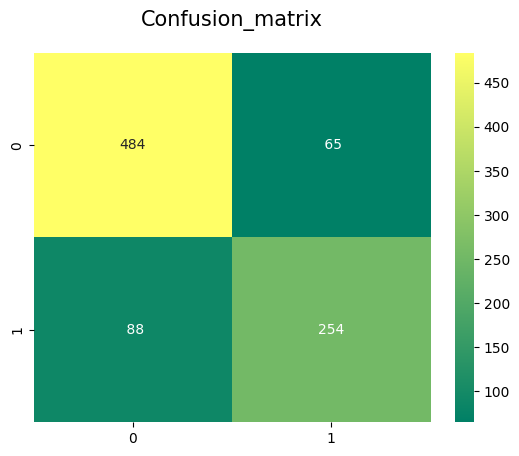

In [157]:
from sklearn.linear_model import LogisticRegression # Logistic Regression

model = LogisticRegression()

model.fit(X_train,y_train)

prediction_lr=model.predict(X_test)

print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=63,shuffle=True) # k=10, split the data into 10 equal parts

result_lr=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Logistic REgression is:',round(result_lr.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)